In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
sns.set()

In [2]:
sk_lt=[]
for i in range(200,6019):
    sk_lt.append(i)

In [3]:
s=pd.read_csv("C:\\Users\\vigne\\Downloads\\train.csv",skiprows=sk_lt)

In [4]:
s.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [5]:
df=s[['Kilometers_Driven']]

In [6]:
x1=df.values.tolist()

In [7]:
def arr(y):
    x=[]
    for i in range(0,len(y)):
        for j in range(0,len(y[i])):
            x.append(y[i][j])
    return x

In [8]:
def conv(y):
    x=[]
    for i in range(0,len(y)):
        y[i]=int(y[i])

In [9]:
df3=s[['Price']]
df3= df3[['Price']].replace(to_replace=r'([a-z/]+|[A-Z/]+)', value='', regex=True)
df3['Price'] = df3['Price'].astype(float)
y=df3.values.tolist()
y=arr(y)
conv(y)
len(y)

200

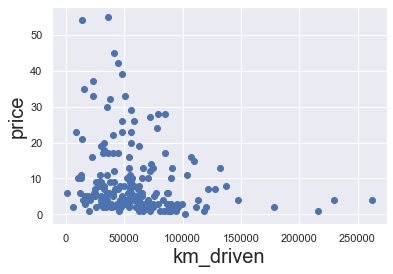

In [10]:
plt.scatter(x1,y)
plt.xlabel('km_driven', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.show()

In [11]:
x= sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     8.774
Date:                Wed, 20 Oct 2021   Prob (F-statistic):            0.00343
Time:                        14:57:56   Log-Likelihood:                -737.22
No. Observations:                 200   AIC:                             1478.
Df Residuals:                     198   BIC:                             1485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3248      1.320      9.339      0.000       9.722      14.927
x1         -5.663e-05   1.91e-05     -2.962      0.003   -9.43e-05   -1.89e-05
==============================================================================
Omnibus:                       98.245   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.106
Skew:                           2.092   Prob(JB):                     1.71e-73
Kurtosis:                       7.765   Cond. No.                     1.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2)

In [13]:
len(X_train)

160

In [14]:
len(X_test)

40

Coefficients: 
 [-3.604411e-05]
Mean squared error: 159.34
Coefficient of determination: 0.05


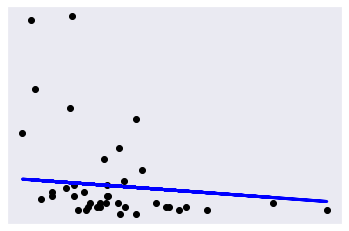

In [15]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f'% mean_squared_error(y_test,y_pred))
print('Coefficient of determination: %.2f'% r2_score(y_test,y_pred))
plt.scatter(X_test,y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [16]:
regr.score(X_test,y_test)

0.051899270004170384

Mean squared error: 206.50
Coefficient of determination: -0.23


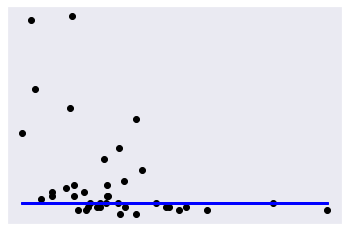

In [17]:
regr = linear_model.LogisticRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
print('Mean squared error: %.2f'% mean_squared_error(y_test,y_pred))
print('Coefficient of determination: %.2f'% r2_score(y_test,y_pred))
plt.scatter(X_test,y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [18]:
sk_lt=[]
for i in range(200,6019):
    sk_lt.append(i)   
s=pd.read_csv("C:\\Users\\vigne\\Downloads\\train.csv",skiprows=sk_lt)
for i in range(0,len(s[['Power']])):
    if pd.isna(i)==True:
        s['Power'][i]='0'
    elif s['Power'][i]=='null bhp':
        s['Power'][i]='0'
df=s[['Kilometers_Driven']]
df1= s[['Mileage','Engine','Power','Seats']].replace(to_replace=r'([a-z/]+|[A-Z/]+)', value='', regex=True)
df2=pd.concat([df,df1],axis=1, join='inner')
df2['Mileage'] = df2['Mileage'].astype(float)
df2['Engine'] = df2['Engine'].astype(float)
df2['Power'] =df2['Power'].astype(float)
df2=df2.fillna(0)
df2
x=df2.values.tolist()
def arr(y):
    x=[]
    for i in range(0,len(y)):
        for j in range(0,len(y[i])):
            x.append(y[i][j])
    return x
def conv(y):
    x=[]
    for i in range(0,len(y)):
        y[i]=int(y[i])
df3=s[['Price']]
df3= df3[['Price']].replace(to_replace=r'([a-z/]+|[A-Z/]+)', value='', regex=True)
df3['Price'] = df3['Price'].astype(float)
y=df3.values.tolist()
y=arr(y)
conv(y)
print(len(y),len(x))

200 200


<ipython-input-18-21067d6fe005>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['Power'][i]='0'


In [19]:
x= sm.add_constant(df2)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     46.83
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           1.35e-31
Time:                        14:57:56   Log-Likelihood:                -662.39
No. Observations:                 200   AIC:                             1337.
Df Residuals:                     194   BIC:                             1357.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.9799      3.951      1.261      0.209      -2.812      12.771
Kilometers_Driven -4.193e-05   1.42e-05     -2.947      0.004      -7e-05   -1.39e-05
Mileage              -0.1016      0.113     -0.901      0.369      -0.324       0.121
Engine                0.0012      0.002      0.674      0.501      -0.002       0.005
Power                 0.0927      0.017      5.601      0.000       0.060       0.125
Seats                -0.8229      0.650     -1.265      0.207      -2.105       0.460
==============================================================================
Omnibus:                       73.498   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.805
Skew:                           1.037   Prob(JB):                    8.52e-172
Kurtosis:                      12.499   Cond. No.                     5.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""